Análisis de texto en tweets

In [1]:
!pip install pandas
!pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = r"C:\Users\isaja\Documents\dcc\e\crisis\data\crisis_texts_dataset.csv"
df = pd.read_csv(file_path, sep=',', encoding='utf-8')
df.head(100)

,tweet_id,text_info,text_info_conf,tweet_text
0,917791044158185473,informative,1.0000,RT @Gizmodo: Wildfires raging through Northern...
1,917791130590183424,informative,1.0000,PHOTOS: Deadly wildfires rage in California ht...
2,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...
3,917792092100988929,informative,0.6727,RT @TIME: California's raging wildfires as you...
4,917792147700465664,informative,0.7143,Wildfires Threaten Californiaâ€™s First Legal ...
...,...,...,...,...
95,917833987824979968,informative,0.6783,Satellite image of California last night. Thos...
96,917834588814155776,informative,0.6854,RT @AuroraWorldView: Deadly #California #wildf...
97,917834628290920448,informative,0.6667,Fire swept through Northern California early M...
98,917835067069788162,informative,1.0000,"Couple, ages 100 and 98, die in CaliforniaÂ wi..."


Análisis de texto informativo

In [4]:
df_informative = df[df['text_info']=='informative'].copy()
df_informative.head(100)

,tweet_id,text_info,text_info_conf,tweet_text
0,917791044158185473,informative,1.0000,RT @Gizmodo: Wildfires raging through Northern...
1,917791130590183424,informative,1.0000,PHOTOS: Deadly wildfires rage in California ht...
2,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...
3,917792092100988929,informative,0.6727,RT @TIME: California's raging wildfires as you...
4,917792147700465664,informative,0.7143,Wildfires Threaten Californiaâ€™s First Legal ...
...,...,...,...,...
108,917839142880468994,informative,1.0000,Slideshow: Ten intense photos from the Califor...
109,917839185779806208,informative,1.0000,USA: California wildfires devastate Silverado ...
110,917840040558055424,informative,1.0000,Our Newest Story (Wildfires blaze in Californi...
111,917840110296752134,informative,1.0000,From #NOAANow - VIIRS Data Captures Raging Wil...


In [5]:
# Muestra aleatoria de textos de los tweets informativos
import random
random_state = random.randint(0, 10000)
sample_texts = df_informative['tweet_text'].sample(100, random_state=random_state)
print("\n======Muestra aleatoria de textos informativos======")
for i, text in enumerate(sample_texts, 1):
    print(f"{text}")


======Muestra aleatoria de textos informativos======
MONSTER HURRICANE MARIA. https://t.co/NKn3dsf1ZV
.@elonmusk @TeslaMotors someone on #stjohnusvi near Francis bay is looking for your help. https://t.co/4hmYxSw9iX https://t.co/CQRWNCftr4
RT @DawgfishJ: Hurricane Irma is Threatening Us w Possible Cat 3 Conditions! Be Smart, Stay Safe! St Marys GA!!! https://t.co/JMxipqeFDj
Fire chief: We got outrun by the fires https://t.co/iD6eETdmGN #USNews #USRC https://t.co/CKTMYvTAAY
RT @thebump: This Newborn Photo Shoot Celebrates Hurricane Harvey Rescue https://t.co/9IPJsImNdO https://t.co/xbdJ9sC9la
Forty dead, neighborhoods burned to ash in California fires https://t.co/CoKHoVuWjw #USNews #USRC https://t.co/84x4QFsbrm
Florida nature centers and sea turtle monitoring programs are hitting the beaches to examine the damage Irma left.‚Ä¶ https://t.co/tQQ0PfpSfW
How I feel about all these storms forming after Irma. https://t.co/k9nEC7YErW
Family Reunited As Dog Survives California Wildfire:https:

In [6]:
# Adición de columnas con características de los textos
df_informative['text_length'] = df_informative['tweet_text'].apply(len)
df_informative['word_count'] = df_informative['tweet_text'].apply(lambda x: len(x.split()))
df_informative['rt'] = df_informative['tweet_text'].apply(lambda x: 1 if x.startswith('RT') else 0)
df_informative['has_url'] = df_informative['tweet_text'].apply(lambda x: 1 if 'http' in x or 'https' in x else 0)
df_informative['hashtag_count'] = df_informative['tweet_text'].apply(lambda x: x.count('#'))
df_informative['mention_count'] = df_informative['tweet_text'].apply(lambda x: x.count('@'))
df_informative.head(128000)

,tweet_id,text_info,text_info_conf,tweet_text,text_length,word_count,rt,has_url,hashtag_count,mention_count
0,917791044158185473,informative,1.0000,RT @Gizmodo: Wildfires raging through Northern...,120,11,1,1,0,1
1,917791130590183424,informative,1.0000,PHOTOS: Deadly wildfires rage in California ht...,91,8,0,1,0,0
2,917791291823591425,informative,0.6813,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,128,13,1,1,0,1
3,917792092100988929,informative,0.6727,RT @TIME: California's raging wildfires as you...,120,13,1,1,0,1
4,917792147700465664,informative,0.7143,Wildfires Threaten Californiaâ€™s First Legal ...,110,9,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
16053,916105333872918528,informative,1.0000,Carlos santana donates $100k to mexico earthqu...,114,12,0,1,0,0
16054,916105374134042624,informative,1.0000,Seth troxler donates 10k to earthquake relief ...,135,15,0,1,0,0
16055,916112796194021376,informative,1.0000,Entercom/San Francisco Stations Raise Funds Fo...,123,11,0,1,0,0
16056,916164076484653056,informative,0.6580,Mexico Earthquakes | International Medical Cor...,111,9,0,1,0,1


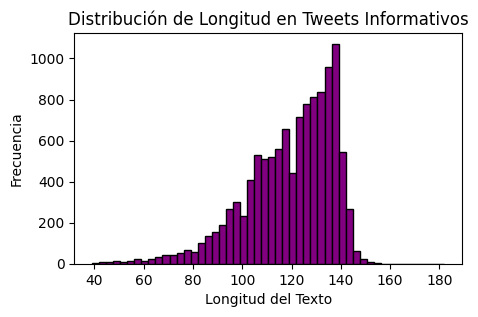

In [7]:
# Gráficos de distribución de las características

# Distribución de la longitud del texto
plt.figure(figsize=(5, 3))
plt.hist(df_informative['text_length'], bins=50, color='purple', edgecolor='black')
plt.title('Distribución de Longitud en Tweets Informativos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

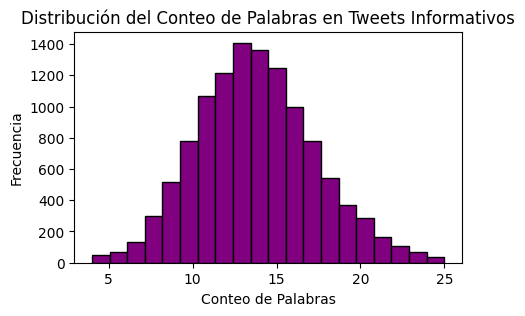

In [8]:
# Distribución del conteo de palabras
plt.figure(figsize=(5, 3))
plt.hist(df_informative['word_count'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Palabras en Tweets Informativos')
plt.xlabel('Conteo de Palabras')
plt.ylabel('Frecuencia')
plt.show()

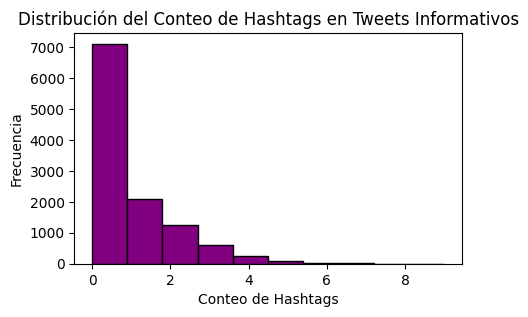

In [9]:
# Distribución del conteo de hashtags
plt.figure(figsize=(5, 3))
plt.hist(df_informative['hashtag_count'], bins=10, color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Hashtags en Tweets Informativos')
plt.xlabel('Conteo de Hashtags')
plt.ylabel('Frecuencia')
plt.show()

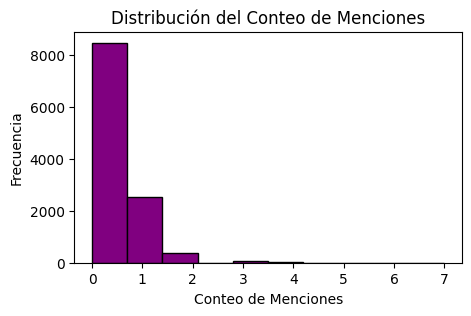

In [10]:
# Distribución del conteo de menciones
plt.figure(figsize=(5, 3))
plt.hist(df_informative['mention_count'], color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Menciones')
plt.xlabel('Conteo de Menciones')
plt.ylabel('Frecuencia')
plt.show()

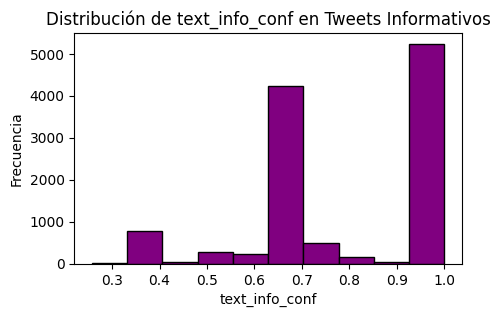

In [11]:
# Distribución de text_info_conf
plt.figure(figsize=(5, 3))
plt.hist(df_informative['text_info_conf'], bins=10, color='purple', edgecolor='black')
plt.title('Distribución de text_info_conf en Tweets Informativos')
plt.xlabel('text_info_conf')
plt.ylabel('Frecuencia')
plt.show()

In [12]:
# Conteo total de tweets informativos
total_informative_tweets = df_informative.shape[0]
print("Número total de tweets informativos:", total_informative_tweets)

# Conteo de tweets informativos con URL
has_url = df_informative['has_url'].value_counts()[1]
print("\nNúmero de tweets informativos con URL:", has_url)
percent_with_url = has_url / total_informative_tweets
print(f"Porcentaje de tweets informativos con URL: {percent_with_url:.2%}")

# Conteo de retweets informativos
retweets = df_informative['rt'].value_counts()[1]
print("\nNúmero de retweets informativos:", retweets)
percent_retweets = retweets / total_informative_tweets
print(f"Porcentaje de retweets informativos: {percent_retweets:.2%}")

# Conteo de tweets informativos con hashtags
no_hashtags = df_informative['hashtag_count'].value_counts()[0]
tweets_with_hashtags = total_informative_tweets - no_hashtags
print("\nNúmero de tweets informativos con hashtags:", tweets_with_hashtags)
percent_with_hashtags = tweets_with_hashtags / total_informative_tweets
print(f"Porcentaje de tweets informativos con hashtags: {percent_with_hashtags:.2%}")


Número total de tweets informativos: 11503

Número de tweets informativos con URL: 11503
Porcentaje de tweets informativos con URL: 100.00%

Número de retweets informativos: 1636
Porcentaje de retweets informativos: 14.22%

Número de tweets informativos con hashtags: 4381
Porcentaje de tweets informativos con hashtags: 38.09%


Análisis de textos no informativos

In [13]:
df_non_informative = df[df['text_info']=='not_informative'].copy()
df_non_informative.head(100)

,tweet_id,text_info,text_info_conf,tweet_text
8,917793736918216706,not_informative,0.6535,California wildfire. á½¡4 https://t.co/a8oD5rkDdI
51,917821459321556992,not_informative,1.0000,"Thinking of all my California loved ones, frie..."
53,917822562259931137,not_informative,0.7023,RT @Rincon_Music: (Radio Reports On California...
57,917825152636907523,not_informative,0.7023,RT @NBCNews: JUST IN: President Trump approves...
59,917825267136995328,not_informative,0.6894,RT @NBCSports: Olympic champion loses gold med...
...,...,...,...,...
527,919626730851241986,not_informative,0.3712,â€˜Weâ€™re going to f*****g die dude!â€™ Video...
529,919627601706143745,not_informative,0.6859,"UFC star, Henry Cujedo, burned while escaping ..."
533,919630733542592512,not_informative,0.6634,RT @JamesHotham: Curious. How can 'fire' do th...
534,919630935531782144,not_informative,0.6683,â€œWeâ€™re Not Dead Yet!â€: Harrowing Video S...


In [14]:
# Muestra aleatoria de textos de los tweets no informativos
import random
random_state = random.randint(0, 10000)
sample_texts = df_non_informative['tweet_text'].sample(100, random_state=random_state)
print("\n======Muestra aleatoria de textos no informativos======")
for i, text in enumerate(sample_texts, 1):
    print(f"{text}")


======Muestra aleatoria de textos no informativos======
Yeah that's my momma! Going crazy for Puerto Rico á¼Ÿ5á¼Ÿ7 #Boriqua https://t.co/lHT14My9Aj
.@RepGutierrez asks how many streets have been fully repaired in Puerto Rico? Zero. https://t.co/RVrGS8S6Wt
RT @rlg100619: In the midst of the crisis in Puerto Rico, who keeps supplying this woman with these t-shirts? https://t.co/ZjsmgXXxdT
#Video #News via #CNN: Puerto Rico a month later is 'post-apocalyptic' | https://t.co/tJGhay1oYi https://t.co/SPFmtC5myD
StormTech II: Hurricane Maria Edition https://t.co/Q3oTg68An4 https://t.co/6ujRqm6VFn
Op-Ed Contributor: The Law Strangling Puerto Rico https://t.co/3tYo5Aw0ui @nytimes https://t.co/WIwDrp8lLU
Your Hurricane funny for the day is: thanks to Irma, These are now in fashion lol #hurricanehumor #duckshoes #funny https://t.co/BJW0d5UCgt
@SherryPie55 Sunset in N Charleston SC, yesterday, courtesy of #HurricaneMaria . https://t.co/xX2pFS8VWr
34 days after Hurricane Maria, RRT Wilson finally 

In [15]:
# Adición de columnas con características de los textos
df_non_informative['text_length'] = df_non_informative['tweet_text'].apply(len)
df_non_informative['word_count'] = df_non_informative['tweet_text'].apply(lambda x: len(x.split()))
df_non_informative['rt'] = df_non_informative['tweet_text'].apply(lambda x: 1 if x.startswith('RT') else 0)
df_non_informative['has_url'] = df_non_informative['tweet_text'].apply(lambda x: 1 if 'http' in x or 'https' in x else 0)
df_non_informative['hashtag_count'] = df_non_informative['tweet_text'].apply(lambda x: x.count('#'))
df_non_informative['mention_count'] = df_non_informative['tweet_text'].apply(lambda x: x.count('@'))
df_non_informative.head(128000)

,tweet_id,text_info,text_info_conf,tweet_text,text_length,word_count,rt,has_url,hashtag_count,mention_count
8,917793736918216706,not_informative,0.6535,California wildfire. á½¡4 https://t.co/a8oD5rkDdI,49,4,0,1,0,0
51,917821459321556992,not_informative,1.0000,"Thinking of all my California loved ones, frie...",116,15,0,1,1,0
53,917822562259931137,not_informative,0.7023,RT @Rincon_Music: (Radio Reports On California...,107,10,1,1,0,1
57,917825152636907523,not_informative,0.7023,RT @NBCNews: JUST IN: President Trump approves...,134,16,1,1,0,1
59,917825267136995328,not_informative,0.6894,RT @NBCSports: Olympic champion loses gold med...,134,14,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
16039,915275806976352256,not_informative,0.6686,TONITE 5-9PM #TACOSFORMEXICO 100% of Proceeds ...,102,10,0,1,1,0
16042,915318053990277122,not_informative,1.0000,Mexicoâ€™s Earthquake Generation | @splinter_n...,97,7,0,1,0,1
16043,915318824357859328,not_informative,1.0000,EPN: Tragedies Have Brought Army and Citizens ...,132,13,0,1,3,0
16046,915972197319155712,not_informative,0.6809,Photos that will make you want to Visit Mexico...,106,12,0,1,0,0


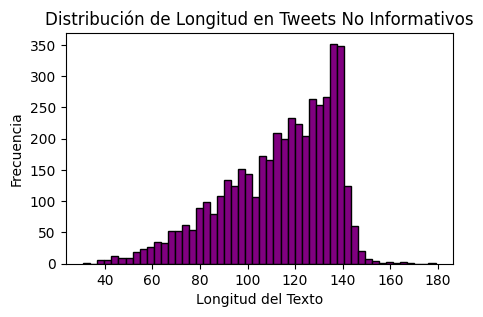

In [16]:
# Gráficos de distribución de las características

# Distribución de la longitud del texto
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['text_length'], bins=50, color='purple', edgecolor='black')
plt.title('Distribución de Longitud en Tweets No Informativos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

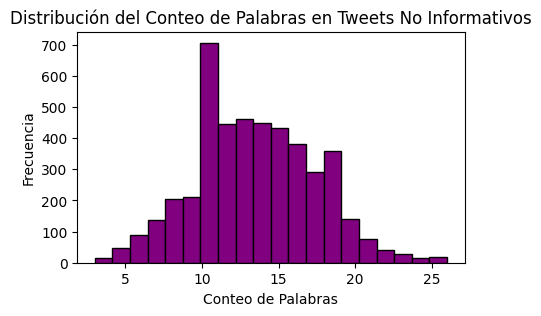

In [17]:
# Distribución del conteo de palabras
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['word_count'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Palabras en Tweets No Informativos')
plt.xlabel('Conteo de Palabras')
plt.ylabel('Frecuencia')
plt.show()

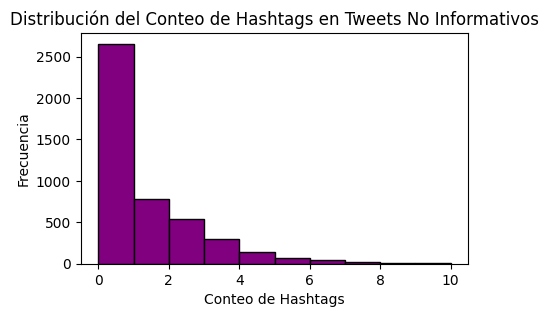

In [18]:
# Distribución del conteo de hashtags
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['hashtag_count'], bins=10, color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Hashtags en Tweets No Informativos')
plt.xlabel('Conteo de Hashtags')
plt.ylabel('Frecuencia')
plt.show()

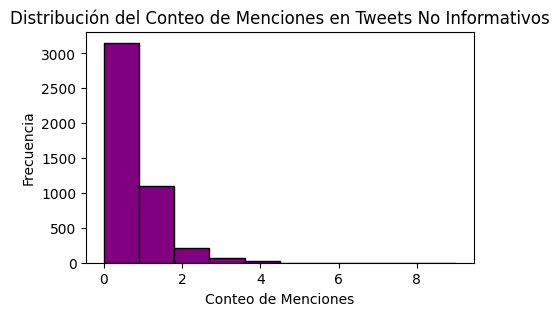

In [19]:
# Distribución del conteo de menciones
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['mention_count'], color='purple', edgecolor='black')
plt.title('Distribución del Conteo de Menciones en Tweets No Informativos')
plt.xlabel('Conteo de Menciones')
plt.ylabel('Frecuencia')
plt.show()

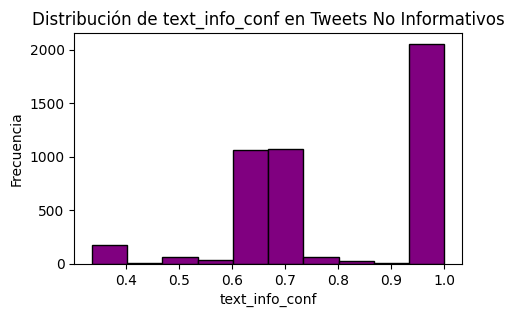

In [20]:
# Distribución de text_info_conf
plt.figure(figsize=(5, 3))
plt.hist(df_non_informative['text_info_conf'], bins=10, color='purple', edgecolor='black')
plt.title('Distribución de text_info_conf en Tweets No Informativos')
plt.xlabel('text_info_conf')
plt.ylabel('Frecuencia')
plt.show()

In [21]:
# Conteo total de tweets no informativos
total_non_informative_tweets = df_non_informative.shape[0]
print("Número total de tweets no informativos:", total_non_informative_tweets)

# Conteo de tweets no informativos con URL
has_url = df_non_informative['has_url'].value_counts()[1]
print("\nNúmero de tweets no informativos con URL:", has_url)
percent_with_url = has_url / total_non_informative_tweets
print(f"Porcentaje de tweets no informativos con URL: {percent_with_url:.2%}")

# Conteo de retweets no informativos
retweets = df_non_informative['rt'].value_counts()[1]
print("\nNúmero de retweets no informativos:", retweets)
percent_retweets = retweets / total_non_informative_tweets
print(f"Porcentaje de retweets no informativos: {percent_retweets:.2%}")

# Conteo de tweets no informativos con hashtags
no_hashtags = df_non_informative['hashtag_count'].value_counts()[0]
tweets_with_hashtags = total_non_informative_tweets - no_hashtags
print("\nNúmero de tweets no informativos con hashtags:", tweets_with_hashtags)
percent_with_hashtags = tweets_with_hashtags / total_non_informative_tweets
print(f"Porcentaje de tweets no informativos con hashtags: {percent_with_hashtags:.2%}")


Número total de tweets no informativos: 4555

Número de tweets no informativos con URL: 4554
Porcentaje de tweets no informativos con URL: 99.98%

Número de retweets no informativos: 570
Porcentaje de retweets no informativos: 12.51%

Número de tweets no informativos con hashtags: 1899
Porcentaje de tweets no informativos con hashtags: 41.69%


Análisis en conjunto

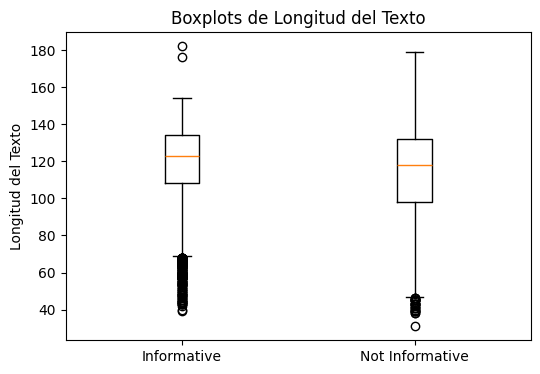

In [22]:
# Boxplots para longitud
plt.figure(figsize=(6, 4))
plt.boxplot([df_informative['text_length'], df_non_informative['text_length']], tick_labels=['Informative', 'Not Informative'])
plt.title('Boxplots de Longitud del Texto')
plt.ylabel('Longitud del Texto')
plt.show()

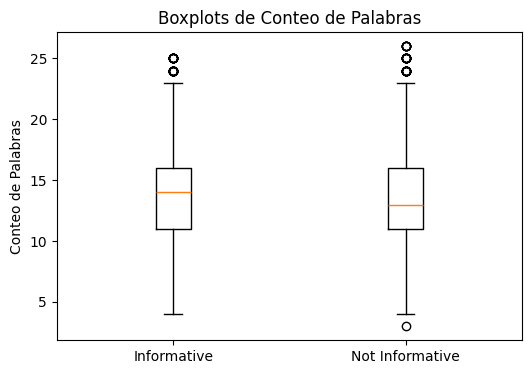

In [23]:
# Boxplot para conteo de palabras
plt.figure(figsize=(6, 4))
plt.boxplot([df_informative['word_count'], df_non_informative['word_count']], tick_labels=['Informative', 'Not Informative'])
plt.title('Boxplots de Conteo de Palabras')
plt.ylabel('Conteo de Palabras')
plt.show()

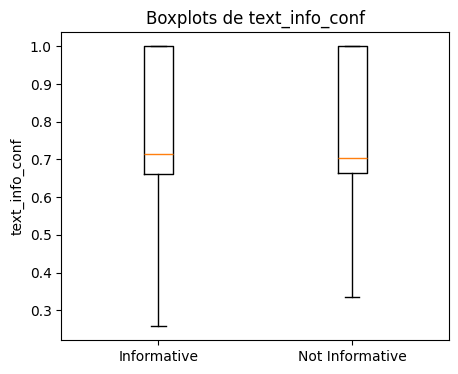

In [24]:
# Boxplots para text_info_conf
plt.figure(figsize=(5, 4))
plt.boxplot([df_informative['text_info_conf'], df_non_informative['text_info_conf']], tick_labels=['Informative', 'Not Informative'])
plt.title('Boxplots de text_info_conf')
plt.ylabel('text_info_conf')
plt.show()